In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
df = pd.read_csv('train/logs/ddpg_data.csv',index_col=0)
df.head()

,state,action,c,Q
0,[-1. -1. -8.],[-2.],0,[]
1,[-1. -1. -8.],[-1.],0,[]
2,[-1. -1. -8.],[0.],0,[]
3,[-1. -1. -8.],[1.],0,[]
4,[-1. -1. -8.],[2.],0,[]


We divided our action and observation space into 5 bins, therefore we should have a total of 5*5*5*5 rows. <br/>
5^3 for (1,3) state vector and another 5 for action vector.

In [7]:
total_rows = df.shape[0]
print("rows:",total_rows)

rows: 625


We can see a (1,3) state vector and (1,1) action vector.<br/>
They both occured 0 times therefore has no Q history.<br/>
Lets see How many State Action pairs never occured:

In [5]:
never_occured = df[df.c==0].shape[0]

print((never_occured*100)/total_rows,"% never occured")

61.76 % never occured


Let's demonstrate the Q function history for the most selected action_state pairs:

In [11]:
most_c = df[df.c == df.c.max()]
most_c

,state,action,c,Q
569,[1. 0. 4.],[2.],11048,"[-39.084824, -39.03244, -38.879787, -43.919815..."


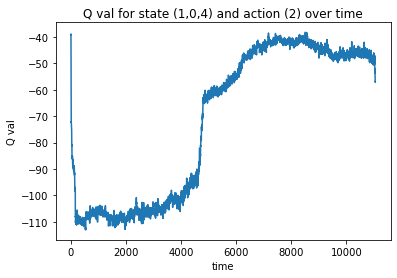

In [26]:
y = literal_eval(most_c.Q.iloc[0])
x = range(len(x))
plt.xlabel('time')
plt.ylabel('Q val')
plt.title('Q val for state (1,0,4) and action (2) over time')
plt.plot(x,y)